A notebook to update the M2 throughput, starting with the source in Docushare, Document-34984, and displaying exactly what is used and how.
* Bo Xin updated October 2019 (data taken in July 2019, and provided by Sandrine Thomas and Tomislav Vucina)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this magic command makes plots appear within the notebook
%matplotlib inline

# Import bandpassUtils, without requiring or using LSST stack -- in order to get the defaultDirectory layout.
currentdir = os.getcwd()
syseng_python = os.path.normpath(os.path.join(currentdir, '../python/lsst/syseng/throughputs'))
if syseng_python not in sys.path:
    sys.path.append(syseng_python)
from bandpassUtils import setDefaultDirs

In [2]:
defaultDirs = setDefaultDirs(rootDir = os.path.normpath(os.path.join(currentdir, '..')))
for k, v in defaultDirs.items():
    print(k, v)

detector /Users/bxin/lsst_stack/syseng_throughputs/components/camera/detector/joint_minimum
lens1 /Users/bxin/lsst_stack/syseng_throughputs/components/camera/lens1
lens2 /Users/bxin/lsst_stack/syseng_throughputs/components/camera/lens2
lens3 /Users/bxin/lsst_stack/syseng_throughputs/components/camera/lens3
filters /Users/bxin/lsst_stack/syseng_throughputs/components/camera/filters
mirror1 /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror1
mirror2 /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2
mirror3 /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror3
atmosphere /Users/bxin/lsst_stack/syseng_throughputs/siteProperties


In [3]:
docusharefile = 'Document-34984.xlsx'
xl = pd.ExcelFile(docusharefile)
df1 = xl.parse('DATA', skiprows=0)
df1[:5]

,Wavelength (nm),C6A,C4A,D3,C3A,D4,C5A,Unnamed: 7,Wavelength (nm).1,AVERAGE
0,1100,99.261,99.404,99.369,99.356,99.445,99.352,NaN,1100,99.364500
1,1099,99.263,99.397,99.362,99.357,99.443,99.349,NaN,1099,99.361833
2,1098,99.255,99.388,99.355,99.347,99.433,99.339,NaN,1098,99.352833
3,1097,99.257,99.390,99.352,99.348,99.431,99.344,NaN,1097,99.353667
4,1096,99.259,99.393,99.357,99.356,99.435,99.343,NaN,1096,99.357167


In [4]:
# we want wavelength in ascending order
na1 = np.array(df1, dtype=np.float64)
idx = np.argsort(na1[:,0])
na1 = na1[idx,:]

In [5]:
na1[:5,:]

array([[ 300.        ,   33.872     ,   34.061     ,   33.564     ,
          33.581     ,   33.443     ,   33.868     ,           nan,
         300.        ,   33.7315    ],
       [ 301.        ,   32.689     ,   32.489     ,   32.921     ,
          32.717     ,   32.635     ,   32.435     ,           nan,
         301.        ,   32.64766667],
       [ 302.        ,   33.809     ,   32.002     ,   31.975     ,
          32.223     ,   31.9       ,   31.92      ,           nan,
         302.        ,   32.30483333],
       [ 303.        ,   31.009     ,   30.776     ,   31.356     ,
          30.909     ,   31.275     ,   31.459     ,           nan,
         303.        ,   31.13066667],
       [ 304.        ,   29.554     ,   29.528     ,   29.862     ,
          29.537     ,   29.572     ,   29.851     ,           nan,
         304.        ,   29.65066667]])

In [6]:
np.mean(na1[:,1:7], axis=1).shape

(801,)

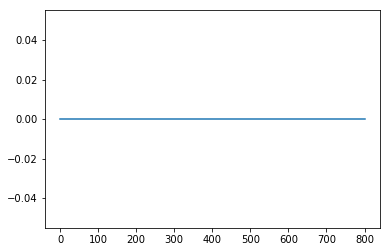

In [7]:
#check the last column is indeed the average of columns 1-6 (column 0 is wavelength)
plt.plot(np.mean(na1[:,1:7], axis=1)-na1[:,-1])

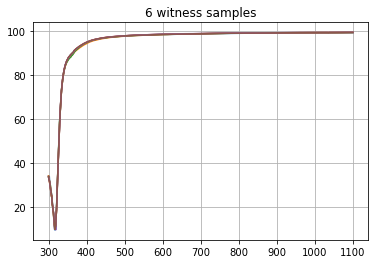

In [8]:
wl = na1[:,0]
#The measurements from 6 witness samples agree nicely
plt.plot(wl, na1[:,1:7])
plt.title('6 witness samples')
plt.grid()

(800, 880)

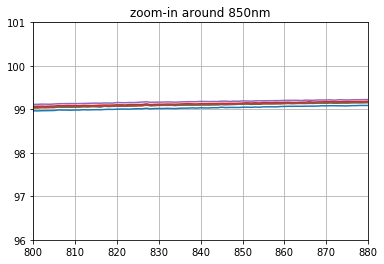

In [9]:
# there are no more discontinuity around 850 nm, which was observed with the June 2019 coating samples
plt.plot(wl, na1[:,1:7]) #, 'b-')
plt.title('zoom-in around 850nm')
plt.grid()
plt.ylim([96, 101])
plt.xlim([800, 880])

In [10]:
t1 = np.mean(na1[:,1:7], axis=1)
t1s = np.std(na1[:,1:7], axis=1)

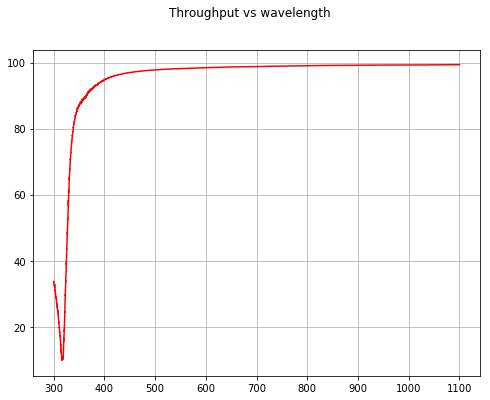

In [11]:
fig1 = plt.figure(figsize=(8, 6))
plt.errorbar(wl, t1, yerr=t1s, fmt='r-', label='M2')
plt.suptitle('Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)

In [12]:
# What's in the destination directory already? 
component = 'mirror2'
contents = os.listdir(defaultDirs[component])
for c in contents:
    tmp = os.path.join(defaultDirs[component], c)
    if os.path.isdir(tmp):
        print('In directory %s:\n \t %s' % (tmp, os.listdir(tmp)))
    else:
        print(tmp)

In directory /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2/m2_Losses:
 	 ['m2_Losses.dat']
/Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2/m2_ProtAg_Ideal.dat


In [13]:
component = 'mirror2'
replacement_file = os.path.join(defaultDirs[component], 'm2_ProtAg_Ideal.dat')
print('Writing to file %s' % replacement_file)

header = '#Wavelength(nm)   Throughput(0-1)'
with open(replacement_file, 'w') as f:
    print(header, file=f)
    for i in range(len(wl)):
        print(round(wl[i], 1), round(t1[i]/100, 4), file=f)

Writing to file /Users/bxin/lsst_stack/syseng_throughputs/components/telescope/mirror2/m2_ProtAg_Ideal.dat


In [14]:
# Compare to prior curves, from github:master -- first clone new copy (default = master).
import shutil
import subprocess

masterdir = 'syseng_master'
# Remove previous copy of this directory, if it exists.
try:
    shutil.rmtree(masterdir)
except OSError:
    pass
gitcommand = 'git clone https://github.com/lsst-pst/syseng_throughputs.git %s' % masterdir
subprocess.run(args=gitcommand.split(), check=True)

CompletedProcess(args=['git', 'clone', 'https://github.com/lsst-pst/syseng_throughputs.git', 'syseng_master'], returncode=0)

In [15]:
masterDirs = setDefaultDirs(rootDir=masterdir)
m2_ref = pd.read_csv(os.path.join(masterDirs['mirror2'], 'm2_ProtAg_Ideal.dat'), delim_whitespace=True,
                     comment='#', header=None, names=['wavelength', 'sb'])

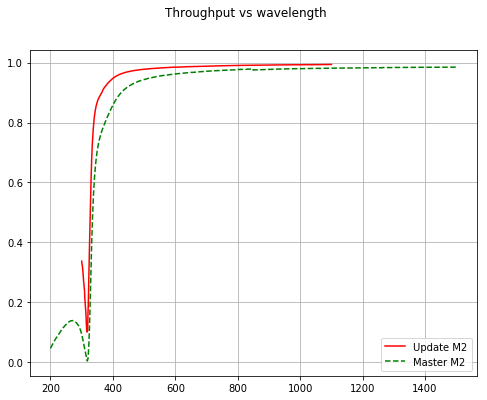

In [16]:
fig1 = plt.figure(figsize=(8, 6))
plt.plot(wl, t1/100, 'r-', label='Update M2')
plt.plot(m2_ref['wavelength'], m2_ref['sb'], 'g--', label='Master M2')
plt.suptitle('Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
plt.legend(loc='lower right')

In [17]:
# When all done - remove the git clone.
shutil.rmtree(masterdir)